# QUESTION 1)

### 1b) Read CSV into jupyter, standardize all columns, and fit a linear model to predict final exam score from Midterm 1.

#### Read in the data and import useful things

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
data = pd.read_csv('/home/marco/Downloads/testScores.csv')

#### Standardize all columns

In [170]:
data = (data - data.mean())/data.std()

#### Find the analytical solution with my answer from 1a

In [171]:
#Take the first column(Midterm 1) and  third column(final)
X = data.iloc[:,0]
Y = data.iloc[:,3]
#Use my answer from 1a to find a and b. The sums and in turn b
#are just going to be 0 since the data is now zero mean,
#but they are included for completeness.
N=25
a = (X.dot(Y) - (1/N)*X.sum()*Y.sum())/(X.dot(X))
b = (1/N) * (Y.sum()-X.sum()*a)

In [172]:
print("Here are my calculated coefficient values!")
print("a is: " + str(a) + " and b is: "+ str(b))

Here are my calculated coefficient values!
a is: 0.9460708318102031 and b is: 7.903008610321238e-16


#### Plot the analytical solution over the data

Text(0.5, 1.0, 'Predicting Final scores from Midterm 1')

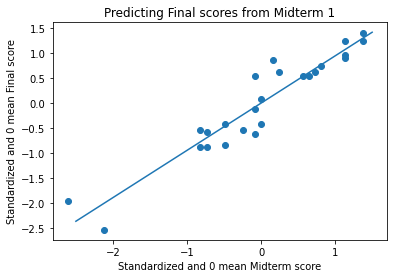

In [173]:
plt.scatter(X,Y)
x = np.linspace(-2.5,1.5,100)
y = a*x + b
plt.plot(x,y)
plt.xlabel("Standardized and 0 mean Midterm score")
plt.ylabel("Standardized and 0 mean Final score")
plt.title("Predicting Final scores from Midterm 1")

### 1c) Use gradient descent to solve for a and b. Start from a=0 and b=0. Include a plot of MSE vs iteration as well as a visualization of a and b converging to the desired values from 1b.

#### From 1a, we have the following definitions for our gradients f'(a) and f'(b) which I am calling da and db respectively. These are vectorized versions of the lines I labeled Equation 1 and Equation 2 in my 1a PDF

In [174]:
da = (1/N *a* X.dot(X)) + ((b/N)*X.sum())- ((1/N)*X.dot(Y))
db = ((2*a/N)*X.sum()) + (2*b) - ((2/N)*Y.sum())

In [175]:
#As a sanity check, the derivatives should be 0 right now since I haven't
#initialized a and b to the starting point of 0:
print("da is: "+str(da)+" and db is: "+str(db))
print("Yay, they are both 0!")

da is: 0.0 and db is: 0.0
Yay, they are both 0!


#### Gradient descent has three steps: initialize W randomly, step in the direction of negative gradient, and repeat until convergent

In [177]:

#Alternate form of gradient descent. Stop at a certain number of iterations
#Initialize randomly:
a = np.random.rand(1)
b = np.random.rand(1)
#lambda isn't specified for 1c. I will use 0.1 as the learning rate
l = 0.1

A = []
B = []
MSE = []
iterations = 200
#Loop and step. Use the definitions for da and db from above.
#Loop for a certain number of iterations
for x in range(iterations):
    #calculate MSE for plotting
    mse = (Y - a*X+b).pow(2).sum() * 1/N
    #Find new a and b
    da = ((1/N *a* X.dot(X)) + ((b/N)*X.sum())- ((1/N)*X.dot(Y)))
    db = (((2*a/N)*X.sum()) + (2*b) - ((2/N)*Y.sum()))
    a = a - l*da
    b = b - l*db
    #add the values of a, b, and mse to our arrays for plotting later
    A.append(a)
    B.append(b)
    MSE.append(mse)
    #Sanity check to see if we are convergent
    if x>(iterations-3):
        print("Gradients at iteration: " + str(x))
        print(da)
        print(db)
print("\nThe gradient is nearly zero and consistent for all weights. We have converged")
print("------------------------------------------------------------------------\n")
print("Using gradient descent with ordinary linear regression, we get weights: \n"  )
print("a: " + str(A[-1]))
print("b: " + str(B[-1]))
print("------------------------------------------------------------------------\n")


Gradients at iteration: 198
[-7.87373389e-10]
[5.02839876e-20]
Gradients at iteration: 199
[-7.11785519e-10]
[4.02271117e-20]

The gradient is nearly zero and consistent for all weights. We have converged
------------------------------------------------------------------------

Using gradient descent with ordinary linear regression, we get weights: 

a: [0.94607083]
b: [7.90316952e-16]
------------------------------------------------------------------------



#### Plot the Mean Squared Error over all of the iterations

Text(0.5, 1.0, 'MSE over 200 iterations')

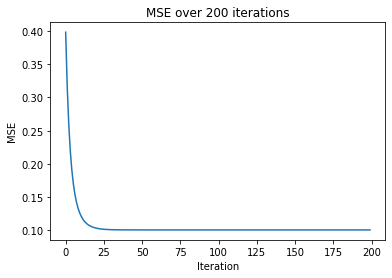

In [178]:
#plot MSE
iters = np.arange(iterations)
plt.plot(iters, MSE)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over " + str(iterations) + " iterations")

#### Plot weights a and b over the iterations. Based on the answers from 1b, we would expect a to approach 0.946 and b to approach 0

Text(0.5, 1.0, 'A and B over 200 iterations')

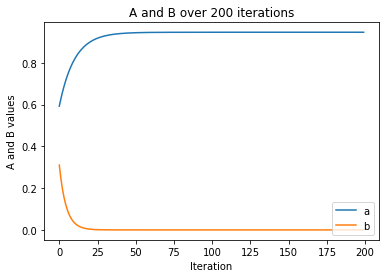

In [179]:
#plot A and B over time
plt.plot(iters, A, label = 'a')
plt.plot(iters, B, label = 'b')
plt.legend(loc="lower right")
plt.xlabel("Iteration")
plt.ylabel("A and B values")
plt.title("A and B over " + str(iterations) + " iterations")

In [180]:
print("To check this all makes sense:")
print("a should start at " + str(A[0][0]) +" and approach " + str(A[-1][0]))
print("b should start at " + str(B[0][0])+ " and approach " + str(B[-1][0]))
print("The weights are changed as expected!")

To check this all makes sense:
a should start at 0.5922946318729372 and approach 0.9460708311399384
b should start at 0.31022642063199496 and approach 7.903169515080444e-16
The weights are changed as expected!


#### Print the results from 1b and 1c to check that they match

In [181]:
print("In part b, we got: \na is: 0.9460708318102031 and b is: 7.903008610321238e-16")
print("\nTo check that it converges as expected:")
print("Now we get a is: " + str(A[-1][0]) + " and b is: " + str(B[-1][0]))

print(np.allclose(a, A[-1][0]))
print(np.allclose(b, B[-1][0]))
print("\n\nWoohoo, they match!")

In part b, we got: 
a is: 0.9460708318102031 and b is: 7.903008610321238e-16

To check that it converges as expected:
Now we get a is: 0.9460708311399384 and b is: 7.903169515080444e-16
True
True


Woohoo, they match!


## QUESTION 2)

### 2a) Use gradient descent to estimate all 4 coefficients in an ordinary linear regression model(R squared loss). Verify  that they match the analytical function. Also plot error vs iteration

#### From class, we have the following expression for the gradient:

#### gradweights = -2$X^{T}$Y + 2*$X^{T}$XW

#### Perform gradient descent with the full matrix X. As the first step, initialize X with 3 columns as the 3 midterms and the fourth as all ones for the bias term. Then, perform gradient descent as before 

In [197]:
#Separate out the data(midterms 1-3) and the final exam scores
#add a column of ones to X for the bias
X = pd.concat([data.iloc[:, 0:3], pd.DataFrame(np.ones(N), columns = ['Bias'])], axis = 1)
Y = data.iloc[:, 3]


#initialize weights w as 0 and learning rate(not specified) as 0.001
W = np.random.rand(4)
l = 0.01


#Perform gradient descent:
#E holds error at each iter
E = []
iterations = 300
#Loop and step. Use the definitions for da and db from above. In this version
#just loop for a certain number of iterations
for x in range(iterations):
    #calculate error for plotting
    e = (Y - X.dot(W)).pow(2).sum()
    #Find new a and b
    dw =  -2*X.transpose().dot(Y) +  2*X.transpose().dot(X).dot(W)
    W = W - l*dw.to_numpy()
    #add the values of a, b, and mse to our arrays for plotting later
    E.append(e)
    #Print the last two gradients as a sanity check to see that we have converged
    if x>(iterations-3):
        print("Gradient at iteration: " + str(x))
        print(dw)
print("\nThe gradient is nearly zero and consistent for all weights. We have converged")
print("-------------------------------------------------------------------------------\n")
print("Using gradient descent with ordinary linear regression, we get weights: \n"  )
print("Midterm 1: " + str(W[0]))
print("Midterm 2: " + str(W[1]))
print("Midterm 3: " + str(W[2]))
print("Bias: " + str(W[3]))
print("-------------------------------------------------------------------------------\n")

Gradient at iteration: 298
EXAM1   -2.993586e-07
EXAM2    1.718013e-07
EXAM3    1.332042e-07
Bias    -4.432507e-23
dtype: float64
Gradient at iteration: 299
EXAM1   -2.870772e-07
EXAM2    1.647409e-07
EXAM3    1.277516e-07
Bias    -4.250747e-23
dtype: float64

The gradient is nearly zero and consistent for all weights. We have converged
-------------------------------------------------------------------------------

Using gradient descent with ordinary linear regression, we get weights: 

Midterm 1: 0.18178183532973177
Midterm 2: 0.2821267411142648
Midterm 3: 0.5712626000739005
Bias: 7.183292730172534e-16
-------------------------------------------------------------------------------



#### From class, we have the following expression for the analytical loss function:

#### weights =($X^{T}$X)$^{-1}$ $X^{T}$Y

#### Check that the analytical solution yields the same results for the weights

In [198]:
#Calculating with the analytical function:
Wa = np.linalg.pinv(X.transpose().dot(X).values).dot(X.transpose()).dot(Y)
print("Using the analytical function, we get weights: \n"  )
print("Midterm 1: " + str(Wa[0]))
print("Midterm 2: " + str(Wa[1]))
print("Midterm 3: " + str(Wa[2]))
print("Bias: " + str(Wa[3]))

Using the analytical function, we get weights: 

Midterm 1: 0.18178190243132852
Midterm 2: 0.2821267026446539
Midterm 3: 0.5712625701760201
Bias: 7.147060721024445e-16


In [199]:
print(np.allclose(W, Wa))

True


#### Gradient descent matches the analytical approach!

#### Plot error against iterations

Text(0.5, 1.0, 'Error over 300 iterations')

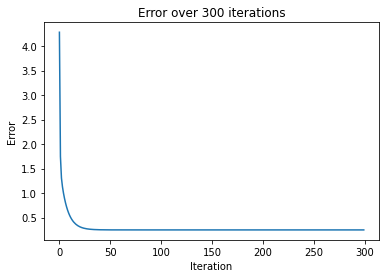

In [200]:
#plot error
iters = np.arange(iterations)
plt.plot(iters, E)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error over " + str(iterations) + " iterations")

### 2b) Use gradient descent to estimate all 4 coefficients with a ridge regression model(including L2 regularization) and lambda 1. Compare results to the analytical function. Plot objective loss vs iteration. How does learning rate affect estimated values?

#### We have a new error term for ridge. From class, error is given by:

#### Sum((Y-Prediction)$^{2}$) + squaredL2norm(W)

#### The gradient of our weights is given by:

#### gradweights = -2$X^{T}$Y + 2*$X^{T}$XW + Lambda * 2W

#### We will find the weights same gradient descent code with the new error and gradweights. I used a nested loop to perform descent with different lambda values

In [201]:
#Separate out the data(midterms 1-3) and the final exam scores
#add a column of ones to X for the bias
X = pd.concat([data.iloc[:, 0:3], pd.DataFrame(np.ones(N), columns = ['Bias'])], axis = 1)
Y = data.iloc[:, 3]


#Use learning rate 0.01
l = 0.01

#Make an array of lambdas to test
lambdas = [0.01, 0.1, 1, 10]

#Perform gradient descent:
#E holds error at each iter for each lambda
E = []
iterations = 200
for la in lambdas:
    #initialize weights
    W = np.random.rand(4)
    #create a temporary array for this lambdas error
    temp = []
    #Loop and step. Use the definition for dw from above. In this version
    #just loop for a certain number of iterations
    for x in range(iterations):
        #calculate error for plotting
        e = ((Y - X.dot(W)).pow(2).sum() + np.absolute(W).sum())
        #Find new a and b44
        dw =  -2*X.transpose().dot(Y) +  2*X.transpose().dot(X).dot(W) + la*2*W
        W = W - l*dw.to_numpy()
        #add the values of a, b, and mse to our arrays for plotting later
        temp.append(e)
    E.append(temp)
    print("\nUsing gradient descent on LASSO with lambda = " + str(la) +" , we get weights:"  )
    print("Midterm 1: " + str(W[0]))
    print("Midterm 2: " + str(W[1]))
    print("Midterm 3: " + str(W[2]))
    print("Bias: " + str(W[3]))
    print("MSE: " + str((1/N)* ((Y - X.dot(W)).pow(2).sum())))
    print("--------------------------------------------------------------------------")


Using gradient descent on LASSO with lambda = 0.01 , we get weights:
Midterm 1: 0.1825035547105583
Midterm 2: 0.2820510648180037
Midterm 3: 0.5704448635657968
Bias: 7.181105613106267e-16
MSE: 0.00992502612615653
--------------------------------------------------------------------------

Using gradient descent on LASSO with lambda = 0.1 , we get weights:
Midterm 1: 0.18878518396238872
Midterm 2: 0.28139384514754756
Midterm 3: 0.5632817093749451
Bias: 7.161170161040958e-16
MSE: 0.009938449551894536
--------------------------------------------------------------------------

Using gradient descent on LASSO with lambda = 1 , we get weights:
Midterm 1: 0.2296761235299761
Midterm 2: 0.27973918097438044
Midterm 3: 0.5093050526307112
Bias: 6.936812526237386e-16
MSE: 0.010773798751827766
--------------------------------------------------------------------------

Using gradient descent on LASSO with lambda = 10 , we get weights:
Midterm 1: 0.27292791736708505
Midterm 2: 0.27236661825882585
Midte

## What does lambda(regularization weight) do?
#### It seems like increasing lambda increases MSE in exchange for making the weights smaller on average. It controls the tradeoff between training error and model simplicity.

#### Side note: it increases MSE but objective error is always minimized as expected

#### Plot the objective error for each lambda

Text(0.5, 1.0, 'Error over 200 iterations')

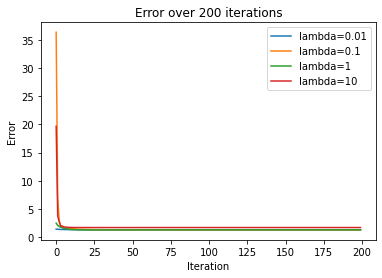

In [202]:
#plot error
iters = np.arange(iterations)
plt.plot(iters, E[0], label = 'lambda=0.01')
plt.plot(iters, E[1], label = 'lambda=0.1')
plt.plot(iters, E[2], label = 'lambda=1')
plt.plot(iters, E[3], label = 'lambda=10')
plt.legend(loc="upper right")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error over " + str(iterations) + " iterations")

#### Compare results to the analytical function:

#### From class, we have the following expression for the analytical loss function:

#### weights =($X^{T}$X + lambda*I)$^{-1}$ $X^{T}$Y

#### Check that the analytical solution yields the same results for the weights

In [204]:
for la in lambdas:
    #Calculating with the analytical function:
    Wa = np.linalg.pinv(X.transpose().dot(X).values +  la * np.eye(len(X.values[0]))).dot(X.transpose()).dot(Y)
    print("\nUsing ridge analytical solution with lambda = " + str(la) +" , we get weights:"  )
    print("Midterm 1: " + str(Wa[0]))
    print("Midterm 2: " + str(Wa[1]))
    print("Midterm 3: " + str(Wa[2]))
    print("Bias: " + str(Wa[3]))


Using ridge analytical solution with lambda = 0.01 , we get weights:
Midterm 1: 0.18250918151727585
Midterm 2: 0.2820478171943541
Midterm 3: 0.5704423783046317
Bias: 6.869504964868156e-16

Using ridge analytical solution with lambda = 0.1 , we get weights:
Midterm 1: 0.18873540645281317
Midterm 2: 0.2814223757939739
Midterm 3: 0.5633038953305189
Bias: 7.077671781985373e-16

Using ridge analytical solution with lambda = 1 , we get weights:
Midterm 1: 0.22967670851623775
Midterm 2: 0.27973884698352297
Midterm 3: 0.5093047905946798
Bias: 6.800116025829084e-16

Using ridge analytical solution with lambda = 10 , we get weights:
Midterm 1: 0.2729279173670856
Midterm 2: 0.2723666182588249
Midterm 3: 0.3516375410221238
Bias: 4.718447854656915e-16


#### They are the same as above! To be sure, use np.allclose to verify they are the same.

In [206]:
print(np.allclose(W, Wa))

True


#### The analytical solution matches gradient descent!!

### 2c) Use gradient descent to find all coefficients in LASSO(L1 regularization) with lambda 1. Include coefficient values, and a plot of objective loss vs iteration.

#### We have a new error term for LASSO. From class, error is given by:

#### Sum((Y-Prediction)$^{2}$) + L1norm(W)

#### The gradient of our weights(also from class) is given by:

#### gradweights = -2$X^{T}$Y + 2*$X^{T}$XW + Lambda * sign(W)

#### Using the same gradient descent code with the new error and gradweights:

In [209]:
#Separate out the data(midterms 1-3) and the final exam scores
#add a column of ones to X for the bias
X = pd.concat([data.iloc[:, 0:3], pd.DataFrame(np.ones(N), columns = ['Bias'])], axis = 1)
Y = data.iloc[:, 3]


#initialize weights w as 0 and learning rate 0.01
W = np.random.rand(4)
l = 0.01
#initialize regularization parameter lambda as 1
la = 1

#Perform gradient descent:
#E holds error at each iter
E = []
iterations = 200
#Loop and step. Use the definitions for da and db from above. In this version
#just loop for a certain number of iterations
for x in range(iterations):
    #calculate error for plotting
    e = ((Y - X.dot(W)).pow(2).sum() + np.absolute(W).sum())
    #Find new a and b44
    dw =  -2*X.transpose().dot(Y) +  2*X.transpose().dot(X).dot(W) + la*np.sign(W)
    W = W - l*dw.to_numpy()
    #add the values of a, b, and mse to our arrays for plotting later
    E.append(e)

print("Using gradient descent on LASSO, we get weights: \n"  )
print("Midterm 1: " + str(W[0]))
print("Midterm 2: " + str(W[1]))
print("Midterm 3: " + str(W[2]))
print("Bias: " + str(W[3]))

Using gradient descent on LASSO, we get weights: 

Midterm 1: 0.17721476833493263
Midterm 2: 0.27318818405219264
Midterm 3: 0.5620703448026285
Bias: -0.006666666666665957


#### Plot the error over iterations

Text(0.5, 1.0, 'Error over 200 iterations')

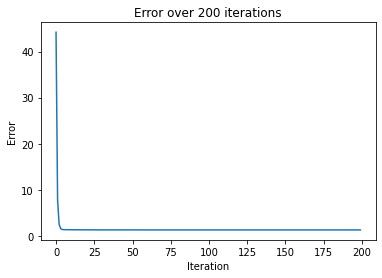

In [210]:
#plot error
iters = np.arange(iterations)
plt.plot(iters, E)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error over " + str(iterations) + " iterations")